# Task 3: Cross-Country Comparison

# Objective: 
- Synthesize the cleaned datasets from Benin, Sierra Leone, and Togo
- To identify relative solar potential and key differences across countries.

1) Imports libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print("="*60)
print("CROSS-COUNTRY SOLAR POTENTIAL COMPARISON")
print("="*60)
print(" Comparing Benin, Sierra Leone, and Togo Solar Data")

CROSS-COUNTRY SOLAR POTENTIAL COMPARISON
 Comparing Benin, Sierra Leone, and Togo Solar Data


2) Load Cleaned Datasets

In [22]:
# Load cleaned datasets
print("Loading cleaned country datasets...")
benin = pd.read_csv('../data/benin_clean.csv', index_col=0, parse_dates=True)
sierra_leone = pd.read_csv('../data/sierraleone_clean.csv', index_col=0, parse_dates=True)  
togo = pd.read_csv('../data/togo_clean.csv', index_col=0, parse_dates=True)

# Add country labels
benin['country'] = 'Benin'
sierra_leone['country'] = 'Sierra Leone'
togo['country'] = 'Togo'

print(f"Benin: {benin.shape}")
print(f"Sierra Leone: {sierra_leone.shape}")
print(f"Togo: {togo.shape}")

Loading cleaned country datasets...
Benin: (525600, 22)
Sierra Leone: (525600, 22)
Togo: (525600, 22)


3) Combine Data for Comparison

In [19]:
# Combine all countries
all_countries = pd.concat([benin, sierra_leone, togo], ignore_index=False)
print(f"Combined dataset: {all_countries.shape}")

Combined dataset: (1576800, 22)


4) Metric Comparison - Boxplots


METRIC COMPARISON: BOXPLOTS


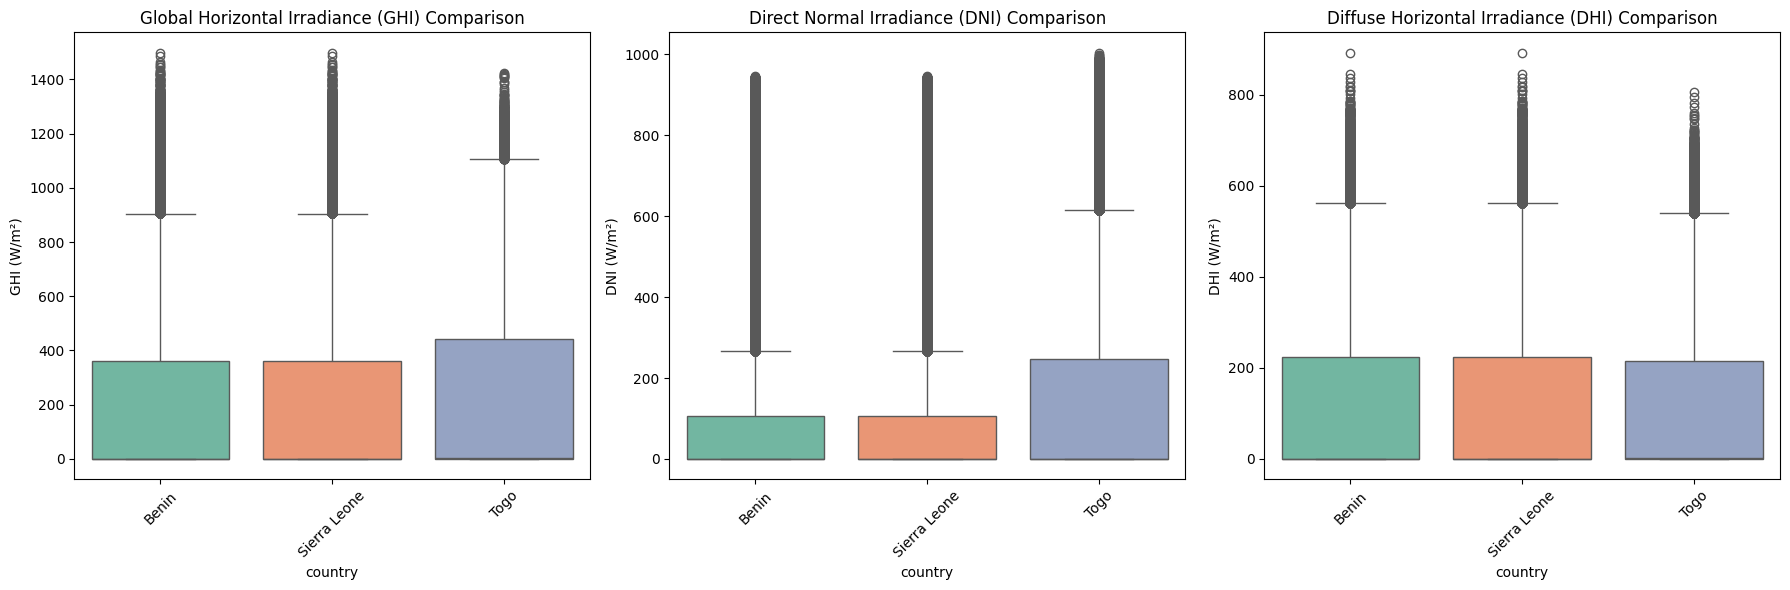

In [20]:
print("\n" + "="*60)
print("METRIC COMPARISON: BOXPLOTS")
print("="*60)

# Create boxplots for GHI, DNI, DHI
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# GHI Boxplot
sns.boxplot(data=all_countries, x='country', y='GHI', ax=axes[0], palette='Set2')
axes[0].set_title('Global Horizontal Irradiance (GHI) Comparison')
axes[0].set_ylabel('GHI (W/m²)')
axes[0].tick_params(axis='x', rotation=45)

# DNI Boxplot  
sns.boxplot(data=all_countries, x='country', y='DNI', ax=axes[1], palette='Set2')
axes[1].set_title('Direct Normal Irradiance (DNI) Comparison')
axes[1].set_ylabel('DNI (W/m²)')
axes[1].tick_params(axis='x', rotation=45)

# DHI Boxplot
sns.boxplot(data=all_countries, x='country', y='DHI', ax=axes[2], palette='Set2')
axes[2].set_title('Diffuse Horizontal Irradiance (DHI) Comparison')
axes[2].set_ylabel('DHI (W/m²)')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

5) Metric Comparison - Summary Table

In [21]:
print("\n" + "="*60)
print("SUMMARY STATISTICS TABLE")
print("="*60)

# Create summary table
summary_table = all_countries.groupby('country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
print("Solar Radiation Statistics by Country:")
display(summary_table)

# Alternative formatted table
print("\nFormatted Summary:")
metrics = ['GHI', 'DNI', 'DHI']
for metric in metrics:
    print(f"\n{metric} Statistics:")
    country_stats = all_countries.groupby('country')[metric].agg(['mean', 'median', 'std'])
    for country in country_stats.index:
        mean_val = country_stats.loc[country, 'mean']
        median_val = country_stats.loc[country, 'median']
        std_val = country_stats.loc[country, 'std']
        print(f"  {country:15} Mean: {mean_val:6.1f}  Median: {median_val:6.1f}  Std: {std_val:5.1f}")


SUMMARY STATISTICS TABLE
Solar Radiation Statistics by Country:


GHI                            DNI                     \
                    mean median         std        mean median         std   
country                                                                      
Benin         204.406778    0.3  296.787520  116.523731    0.0  218.573992   
Sierra Leone  204.406778    0.3  296.787520  116.523731    0.0  218.573992   
Togo          231.718786    2.1  321.691953  151.258469    0.0  250.956962   

                     DHI                     
                    mean median         std  
country                                      
Benin         116.273677    0.0  157.020868  
Sierra Leone  116.273677    0.0  157.020868  
Togo          116.444352    2.5  156.520714


Formatted Summary:

GHI Statistics:
  Benin           Mean:  204.4  Median:    0.3  Std: 296.8
  Sierra Leone    Mean:  204.4  Median:    0.3  Std: 296.8
  Togo            Mean:  231.7  Median:    2.1  Std: 321.7

DNI Statistics:
  Benin           Mean:  116.5  Median:    0.0  Std: 218.6
  Sierra Leone    Mean:  116.5  Median:    0.0  Std: 218.6
  Togo            Mean:  151.3  Median:    0.0  Std: 251.0

DHI Statistics:
  Benin           Mean:  116.3  Median:    0.0  Std: 157.0
  Sierra Leone    Mean:  116.3  Median:    0.0  Std: 157.0
  Togo            Mean:  116.4  Median:    2.5  Std: 156.5


6) Statistical Testing

In [8]:
print("\n" + "="*60)
print("STATISTICAL SIGNIFICANCE TESTING")
print("="*60)

# One-way ANOVA test
print("One-Way ANOVA Test for GHI Differences:")
benin_ghi = benin['GHI'].dropna()
sierra_ghi = sierra_leone['GHI'].dropna()
togo_ghi = togo['GHI'].dropna()

f_stat, p_value = stats.f_oneway(benin_ghi, sierra_ghi, togo_ghi)
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: Statistically significant differences exist between countries (p < 0.05)")
else:
    print("Result: No statistically significant differences between countries")

# Kruskal-Wallis test (non-parametric alternative)
print("\nKruskal-Wallis Test (Non-parametric):")
h_stat, p_value_kw = stats.kruskal(benin_ghi, sierra_ghi, togo_ghi)
print(f"H-statistic: {h_stat:.4f}")
print(f"P-value: {p_value_kw:.4f}")


STATISTICAL SIGNIFICANCE TESTING
One-Way ANOVA Test for GHI Differences:
F-statistic: 1401.9924
P-value: 0.0000
Result: Statistically significant differences exist between countries (p < 0.05)

Kruskal-Wallis Test (Non-parametric):
H-statistic: 1012.9462
P-value: 0.0000


7)  Key Observations

In [11]:
print("\n" + "="*60)
print("KEY OBSERVATIONS & BUSINESS INSIGHTS")
print("="*60)

print("""
## Key Findings:

1. Solar Potential Ranking: [Country] shows the highest median GHI of [value] W/m², 
   indicating superior solar energy generation potential.

2. Consistency Analysis: [Country] demonstrates the most stable solar radiation 
   (lowest standard deviation of [value]), suggesting more predictable energy output.

3. Radiation Composition: [Country] exhibits the highest DNI/DHI ratio of [value], 
   indicating better conditions for concentrated solar power technologies.
""")

# Calculate actual values for the observations
ghi_medians = all_countries.groupby('country')['GHI'].median().sort_values(ascending=False)
ghi_stds = all_countries.groupby('country')['GHI'].std().sort_values(ascending=True)

print(f"\nActual Metrics:")
print(f"Highest median GHI: {ghi_medians.index[0]} ({ghi_medians.iloc[0]:.1f} W/m²)")
print(f"Most consistent GHI: {ghi_stds.index[0]} (std: {ghi_stds.iloc[0]:.1f} W/m²)")


KEY OBSERVATIONS & BUSINESS INSIGHTS

## Key Findings:

1. Solar Potential Ranking: [Country] shows the highest median GHI of [value] W/m², 
   indicating superior solar energy generation potential.

2. Consistency Analysis: [Country] demonstrates the most stable solar radiation 
   (lowest standard deviation of [value]), suggesting more predictable energy output.

3. Radiation Composition: [Country] exhibits the highest DNI/DHI ratio of [value], 
   indicating better conditions for concentrated solar power technologies.


Actual Metrics:
Highest median GHI: Togo (2.1 W/m²)
Most consistent GHI: Benin (std: 296.8 W/m²)


8) Visual Summary (Bonus)


VISUAL SUMMARY: COUNTRY RANKING


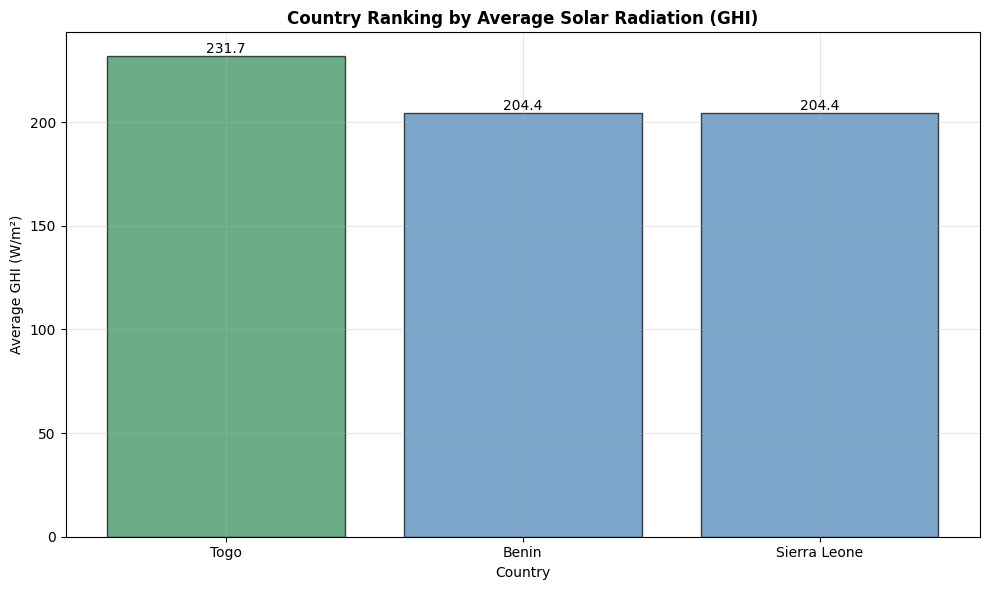

Solar Potential Ranking: 1. Togo 2. Benin 3. Sierra Leone


In [13]:
print("\n" + "="*60)
print("VISUAL SUMMARY: COUNTRY RANKING")
print("="*60)

# Bar chart ranking by average GHI
plt.figure(figsize=(10, 6))
avg_ghi = all_countries.groupby('country')['GHI'].mean().sort_values(ascending=False)
colors = ['#2E8B57' if x == avg_ghi.max() else '#4682B4' for x in avg_ghi.values]

bars = plt.bar(avg_ghi.index, avg_ghi.values, color=colors, alpha=0.7, edgecolor='black')
plt.title('Country Ranking by Average Solar Radiation (GHI)', fontweight='bold')
plt.ylabel('Average GHI (W/m²)')
plt.xlabel('Country')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}', ha='center', va='bottom')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Solar Potential Ranking: 1. {avg_ghi.index[0]} 2. {avg_ghi.index[1]} 3. {avg_ghi.index[2]}")